# CASE STUDY-1

List of Locations with number of fundings is given as:
Bangalore - 635
Mumbai - 449
New Delhi - 389
Gurgaon - 241
Pune - 91
Noida - 79
Maximum Funding is done in Bangalore , 635 times.


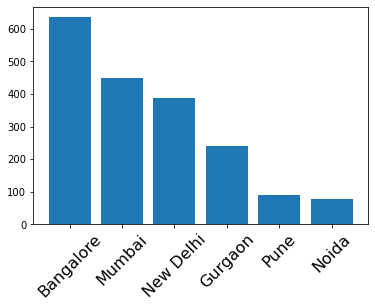

In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt
with open('startup_funding.csv') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    city=[]
    for row in file_data:
        city.append(row['CityLocation'])
    np_city=np.array(city)
    np_city=np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()
    
    dic=dict()
    for i in np_city:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    
    xaxis=[]
    yaxis=[]
    
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    np_xaxis=np.array(xaxis)
    np_yaxis=np.array(yaxis)
    
    np_xaxis=np_xaxis[np.argsort(np_yaxis)]
    np_yaxis=np.sort(np_yaxis)
    
    
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-6:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-6:-1]
    print("List of Locations with number of fundings is given as:")
    for i in range(len(np_xaxis)):
        
        print(np_xaxis[i],"-", np_yaxis[i])
    ind=np_yaxis.argmax()
    print("Maximum Funding is done in",np_xaxis[ind],",",np_yaxis[ind],"times.")
    plt.bar(np_xaxis,np_yaxis)
    plt.xticks(rotation=45, size=16)
    plt.show()
    
    


# CASE STUDY-2

Top 5 Investors are:
Sequoia Capital - 64
Accel Partners - 53
Kalaari Capital - 44
SAIF Partners - 41
Indian Angel Network - 40


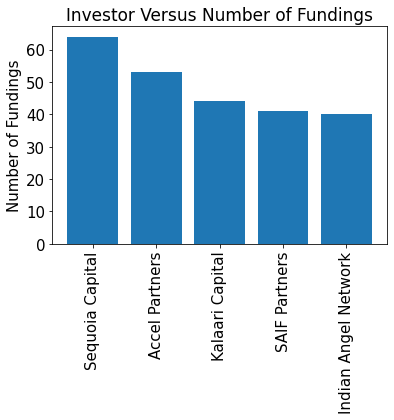

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

df.dropna(subset = ["InvestorsName"],inplace = True)  #removing row's having nan's in Investors name column..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...
for i in df["InvestorsName"].values:  #traversing through the investor names..to see the number of times the names appeared..
    if "," in i:  #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) +1
investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

# CASE STUDY-3

Top 5 Investors are:
Sequoia Capital - 48
Accel Partners - 47
Kalaari Capital - 41
Indian Angel Network - 40
Blume Ventures - 36


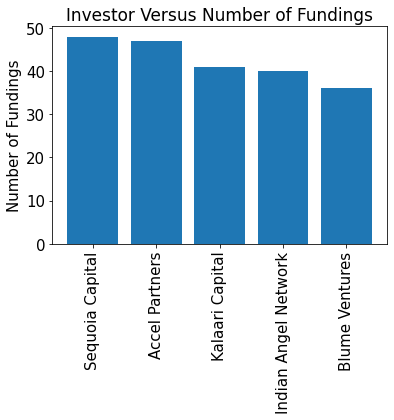

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if invest != "":
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

# CASE STUDY-4

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network - 33
Rajan Anandan - 23
LetsVenture - 16
Anupam Mittal - 16
Group of Angel Investors - 14


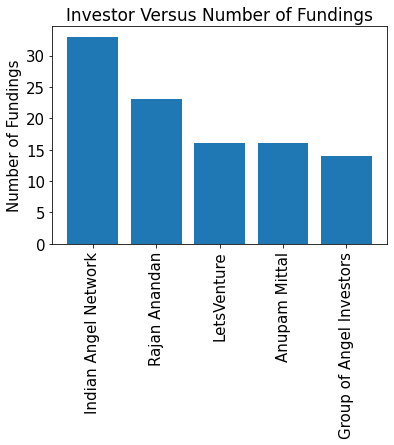

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

# CASE STUDY-5

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24


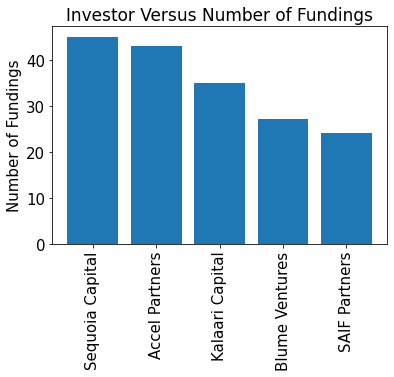

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()